In [111]:
# following tutorial from:
# https://github.com/vanderschaarlab/synthcity/blob/main/tutorials/tutorial7_image_generation_using_mednist.ipynb

In [112]:
import torch
import torchvision
import numpy as np
import os
from synthcity.plugins.core.dataloader import ImageDataLoader
from synthcity.plugins import Plugins
from synthcity.plugins.core.models.image_gan import display_imgs
import PIL

In [113]:
max_len = 30

In [114]:
file_paths = [os.path.join("training_set/benign", filename) for filename in os.listdir("training_set/benign") if "mask" not in filename] + [os.path.join("training_set/malignant", filename) for filename in os.listdir("training_set/malignant") if "mask" not in filename]
labels = [0.0 for filename in os.listdir("training_set/benign") if "mask" not in filename] + [1.0 for filename in os.listdir("training_set/malignant") if "mask" not in filename]

In [115]:
class CancerDataset(torch.utils.data.Dataset):
    def __init__(self, image_files, labels):
        self.image_files = image_files
        self.labels = torch.tensor(labels).float()

    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        # stretches some images but cnns need them to be the same size to work properly
        img = PIL.Image.open(self.image_files[index])#.resize((224, 224))
        #img = PIL.ImageOps.grayscale(img)
        img = np.asarray(img)
        if self.labels[index].dtype != torch.float32:
            print(self.labels[index])

        return img, self.labels[index]

In [116]:
print(PIL.Image.open(file_paths[0]).size)

(323, 473)


In [117]:
dataset = CancerDataset(file_paths, labels= labels)

dataloader = ImageDataLoader(dataset, height=128)

[2025-03-13T02:00:09.725441-0700][6936][CRITICAL] module disabled: c:\Users\klado\AppData\Local\Programs\Python\Python311\Lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


 16%|█▋        | 49/300 [1:05:41<5:23:17, 77.28s/it]

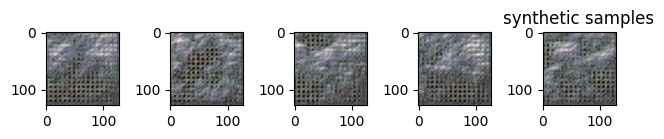

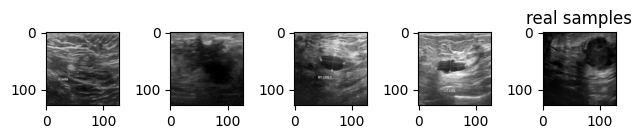

 33%|███▎      | 99/300 [2:13:39<4:42:49, 84.42s/it]

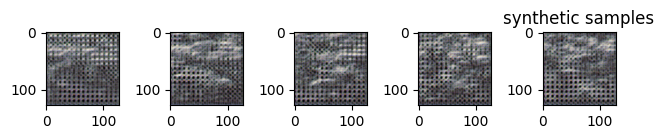

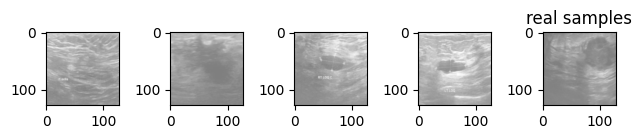

 50%|████▉     | 149/300 [3:26:52<3:45:19, 89.53s/it]

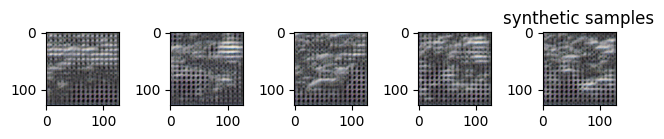

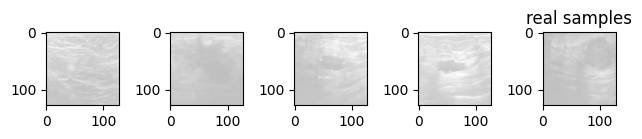

 66%|██████▋   | 199/300 [4:43:28<2:36:35, 93.03s/it]

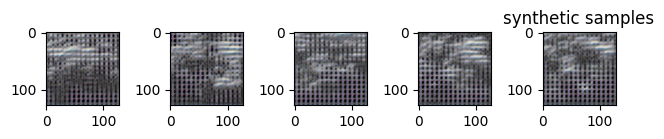

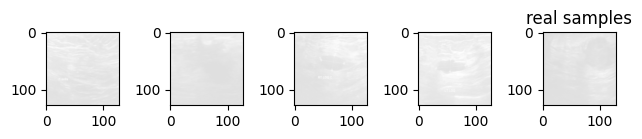

 83%|████████▎ | 249/300 [6:02:18<1:21:00, 95.31s/it]

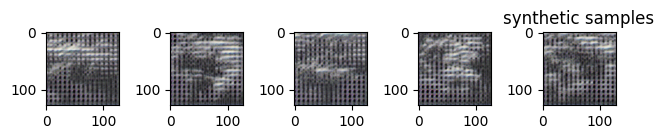

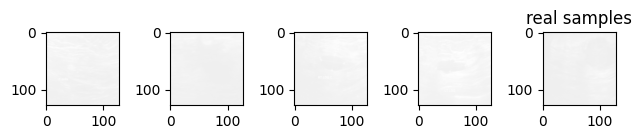

100%|█████████▉| 299/300 [7:22:17<01:36, 96.18s/it]   

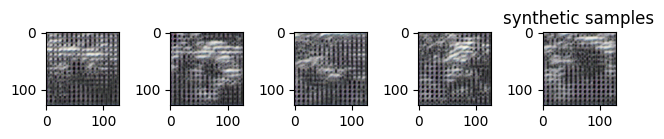

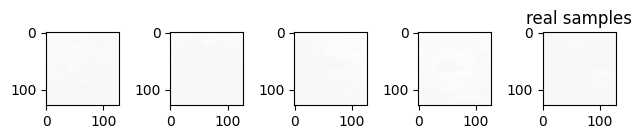

100%|██████████| 300/300 [7:24:11<00:00, 88.84s/it] 


In [118]:
generator = Plugins().get("image_cgan", plot_progress=True, n_iter = 300)

generator.fit(dataloader)

In [ ]:
import pickle

with open("synth_data_generator.pkl", "wb") as f:
    pickle.dump(generator, f)

NameError: name 'max_len' is not defined

In [2]:
syn_samples, syn_labels = generator.generate(count=5).unpack().tensors()
display_imgs(syn_samples)
print(type(syn_samples))

for idx, sample in enumerate(syn_samples):
    img = torchvision.transforms.functional.to_pil_image(sample, mode = "L")
    img = PIL.ImageOps.grayscale(img)
    print(img.size)
    img.save(os.path.join("synthetic_set/", "synth_" + str(idx) + ".png"))


NameError: name 'generator' is not defined